<img src="https://images.indianexpress.com/2017/10/ai-hd-images.jpg" width = "500" align="center">
<h1 align="center"><font size="8">Image Super Resolution</font></h1>
<h1 align="right"><font size="5">- Pravin Nanasaheb Chavan</font></h1>

## Problem Statement
#### The main goal of image super-resolution (SR) is to recover a high-resolution image from a low-resolution input. Super resolution convolutional neural network (SRCNN) can be used to convert image into low clearity (low resolution) as well as converting low resolution images into high resolution images. To accomplish this goal, we will be deploying the super-resolution convolution neural network (SRCNN) using Keras. This network was published in the paper, “Image Super-Resolution Using Deep Convolutional Networks” by Chao Dong, et al. in 2014. You can read the full paper at https://arxiv.org/abs/1501.00092. 
#### The SRCNN consists of the following main operations:
1. Importing useful packages and libraries
2. Setting Image Quality Metrics
1. Preprocessing: Up-scales Low Resolution image to desired High Resolution size.
2. Feature Extraction: Extracts a set of feature maps from the up-scaled Low Resolution image.
3. Non-linear Mapping: Maps the feature maps representing LR to HR patches.
4. Reconstruction: Produces the HR image from HR patches.

## 1. Importing useful packages and libraries
 Here we are going to use Keras Library for SRCNN. Also other main libraries like numpy, cv2, matplotlib, skimage, etc. which will help us to use and see the results of SRCNN. We are also going to see the versions of the same. 

In [1]:
import sys
import keras
import cv2
import numpy
import matplotlib
import skimage
print('Python: {}'.format(sys.version))
print('Keras: {}'.format(keras.__version__))
print('OpenCV: {}'.format(cv2.__version__))
print('NumPy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Scikit-Image: {}'.format(skimage.__version__))

Python: 3.8.2 (tags/v3.8.2:7b3ab59, Feb 25 2020, 23:03:10) [MSC v.1916 64 bit (AMD64)]
Keras: 2.4.3
OpenCV: 4.4.0
NumPy: 1.18.4
Matplotlib: 3.3.1
Scikit-Image: 0.17.2


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.measure import compare_ssim as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os
%matplotlib inline

## 2. Setting Image Quality Metrics
We will use Peak Signal-to-Noise Ratio (PSNR), Mean Squared Error (MSE) and Structural Similarity (SSIM) Index for comparing the images. The structural similarity (SSIM) index was imported directly from the scikit-image library; however, we will have to define our own functions for the PSNR and MSE.

In [3]:
# define a function for peak signal-to-noise ratio (PSNR)
def psnr(target, ref):

    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)

    diff = ref_data - target_data
    diff = diff.flatten('C')
    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

# define function for mean squared error (MSE)
def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])
    
    return err

# define function that combines all three image quality metrics
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel =True))
    
    return scores

## 3. Low Resolution Images
We can use any image in any image file format(JPG, PNG, BMP, etc.) for this project. We are using the same images as used by the same images that were used in the original SRCNN paper. We can download these images from http://mmlab.ie.cuhk.edu.hk/projects/SRCNN.html. The .zip file identified as the MATLAB code contains the images we want. Copy both the Set5 and Set14 datasets into a new folder called ‘source’. We are using the same images as they are of different sizes and differential from each other. 
### 3.1 Preparing Images
Now that we have some images, we want to produce low-resolution versions of these same images. We can accomplish this by resizing the images, both downwards and upwards, using OpeCV. There are several interpolation methods that can be used to resize images; however, we will be using bilinear interpolation.

Once we produce these low-resolution images, we can save them in a new folder(here we have used "images").

In [4]:
# prepare degraded images by introducing quality distortions via resizing

def prepare_images(path, factor):
    
    # loop through the files in the directory
    for file in os.listdir(path):
        
        # open the file
        img = cv2.imread(path + '/' + file)
        
        # find old and new image dimensions
        h, w, c = img.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        
        # resize the image - down
        img = cv2.resize (img, (new_width, new_height), interpolation = cv2.INTER_LINEAR)
        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite('images/{}'.format(file), img)
        
prepare_images('source/',2)

Saving baboon.bmp
Saving barbara.bmp
Saving coastguard.bmp
Saving comic.bmp
Saving face.bmp
Saving flowers.bmp
Saving foreman.bmp
Saving lenna.bmp
Saving monarch.bmp
Saving pepper.bmp
Saving ppt3.bmp
Saving zebra.bmp


### 3.2 Testing Low Resolution Images
To ensure that our image quality metrics are being calculated correctly and that the images were effectively degraded, let's calculate the PSNR, MSE, and SSIM between our low resolution image and the original image.

In [5]:
# test the generated images using the image quality metrics

for file in os.listdir('images/'):
    
    # open target and reference images
    target = cv2.imread('images/{}'.format(file))
    ref = cv2.imread('source/{}'.format(file))
    
    # calculate score
    scores = compare_images(target, ref)

    # print all three scores with new line characters (\n) 
    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))

<ipython-input-3-fd453683e729>:27: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  scores.append(ssim(target, ref, multichannel =True))


baboon.bmp
PSNR: 22.157084083442548
MSE: 1187.1161333333334
SSIM: 0.629277587900277

barbara.bmp
PSNR: 25.906629837568126
MSE: 500.65508535879627
SSIM: 0.8098632646406401

coastguard.bmp
PSNR: 27.161600663887082
MSE: 375.00887784090907
SSIM: 0.756950063354931

comic.bmp
PSNR: 23.799861502225532
MSE: 813.2338836565096
SSIM: 0.8347335416398209

face.bmp
PSNR: 30.99220650287191
MSE: 155.23189718546524
SSIM: 0.8008439492289884

flowers.bmp
PSNR: 27.454504805386147
MSE: 350.55093922651935
SSIM: 0.8697286286974628

foreman.bmp
PSNR: 30.14456532664372
MSE: 188.6883483270202
SSIM: 0.933268417388899

lenna.bmp
PSNR: 31.47349297867539
MSE: 138.94800567626953
SSIM: 0.8460989200521499

monarch.bmp
PSNR: 30.196242365288896
MSE: 186.45643615722656
SSIM: 0.9439574293434104

pepper.bmp
PSNR: 29.88947161686106
MSE: 200.1033935546875
SSIM: 0.8357937568464359

ppt3.bmp
PSNR: 24.84926168950471
MSE: 638.6684263912582
SSIM: 0.9284023942315316

zebra.bmp
PSNR: 27.909840639329513
MSE: 315.6585459528818
SSIM: 

## 4. Building the SRCNN Model
Now that we have our low-resolution images and all three image quality metrics functioning properly, we can start building the SRCNN. In Keras, it’s as simple as adding layers one after the other. 

In [6]:
# define the SRCNN model
def model():
    
    # define model type
    SRCNN = Sequential()
    
    # add model layers
    SRCNN.add(Conv2D(filters=128, kernel_size = (9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size = (3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size = (5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    
    # define optimizer
    adam = Adam(lr=0.0003)
    
    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

## 5. Deploying the SRCNN
### 5.1 Image Processing Functions
We will need to define a couple of image processing functions. Furthermore, it will be necessary to preprocess the images extensively before using them as inputs to the network.

In [7]:
def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img


def shave(image, border):
    img = image[border: -border, border: -border]
    return img

### 5.2 SRCNN Model
After defining image processing functions, to reduce the time to train the algorithm we will use the already trained parameteres downloaded from https://github.com/MarkPrecursor/SRCNN-keras.

Now we are able to define our SRCNN model. Also after modifying the low resolution image into high resolution we will save all the images in folder "Cleared". Furthermore, after processing, we can calculate the PSNR, MSE, and SSIM on the images that we produce.

In [8]:
# define main prediction function
def predict(image_path):
    
    # load the srcnn model with weights
    srcnn = model()
    srcnn.load_weights('weights.h5')
    
    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('source/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = numpy.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # saving the output
    print('Saving {}'.format(file))
    cv2.imwrite('Cleared/{}'.format(file), output)
    
    # remove border from reference and degraged image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
    
    # image quality calculations
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))
    scores.append(compare_images(degraded, output))
    
    # return images and scores
    return ref, degraded, output, scores

ref, degraded, output, scores = predict('images/flowers.bmp')

Saving flowers.bmp


<ipython-input-3-fd453683e729>:27: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  scores.append(ssim(target, ref, multichannel =True))


## 6. Saving Results in Single File
### Printing Result and All Images for Single Processed Image (OPTIONAL)
In this part, we can process a single image throughout the algorithms in first line of code. After converting it to low resolution and converting back to high resolution we will seel the result in jupyter lab along with metrics score.

Saving pepper.bmp


<ipython-input-3-fd453683e729>:27: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  scores.append(ssim(target, ref, multichannel =True))


Degraded Image: 
PSNR: 31.447216790117892
MSE: 139.79123334383812
SSIM: 0.8376728547554606

Reconstructed Image: 
PSNR: 32.783323841694596
MSE: 102.77068030674003
SSIM: 0.8495930983760566

Reconstructed and degraded Image: 
PSNR: 36.07580431305387
MSE: 48.15275993309253
SSIM: 0.9706262066849781



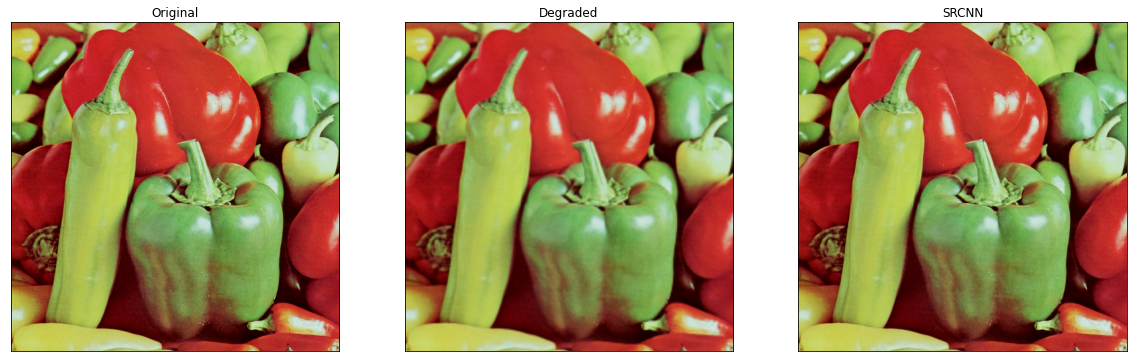

In [13]:
ref, degraded, output, scores = predict('images/pepper.bmp')

# print all scores for all images
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))
print('Reconstructed and degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[2][0], scores[2][1], scores[2][2]))

# display images as subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

# remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

### Saving All Images from Single Image Processed in to Single Image
In this part we will save all images obtained by processing every single image in folder "images" into a single file. The images are saved along with the metrics scores in folder "output".

In [10]:
for file in os.listdir('images'):
    
    # perform super-resolution
    ref, degraded, output, scores = predict('images/{}'.format(file))
    
    # display images as subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded')
    axs[1].set(xlabel = 'PSNR: {}\nMSE: {} \nSSIM: {}'.format(scores[0][0], scores[0][1], scores[0][2]))
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN')
    axs[2].set(xlabel = 'PSNR: {} \nMSE: {} \nSSIM: {}'.format(scores[1][0], scores[1][1], scores[1][2]))

    # remove the x and y ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
      
    print('Saving {}'.format(file))
    fig.savefig('output/{}.png'.format(os.path.splitext(file)[0])) 
    plt.close()
    
print('All files saved.')

Saving baboon.bmp


<ipython-input-3-fd453683e729>:27: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  scores.append(ssim(target, ref, multichannel =True))


Saving baboon.bmp
Saving barbara.bmp
Saving barbara.bmp
Saving coastguard.bmp
Saving coastguard.bmp
Saving comic.bmp
Saving comic.bmp
Saving face.bmp
Saving face.bmp
Saving flowers.bmp
Saving flowers.bmp
Saving foreman.bmp
Saving foreman.bmp
Saving lenna.bmp
Saving lenna.bmp
Saving monarch.bmp
Saving monarch.bmp
Saving pepper.bmp
Saving pepper.bmp
Saving ppt3.bmp
Saving ppt3.bmp
Saving zebra.bmp
Saving zebra.bmp
All files saved.
